# Movie Recommendation System

### Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success? These are the questions that inspired us to take these datasets up, combine them and perform our analysis.

In this project, we have used 2 data sources that are **TMDB 5000 movies dataset** and **Movies Credits dataset**.
TMDB 5000 Movies dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv
Movies Credits dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_credits.csv

In this project, we imported and analysed two dataset and then communicated the findings about it. We used the Python libraries NumPy, pandas, and Matplotlib to make your analysis easier.

This data set contains information movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

We will explore the following questions:

1. Finding the top 10 popular movies
2. Relationship of Revenue with budget
3. Distribution of all the columns in the dataset
4. Analysis of runtime of movies
5. Finding the most profitable movie

Apart from EDA, we have also created a movie recommendation system.

# EDA

In [2]:
# Import necessary Pandas Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Magic words usage to show plots within the document
%matplotlib inline

In [4]:
# Importing the datasets
movies = pd.read_csv('5000_movies.csv')
credits = pd.read_csv('movies_credits.csv')

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
#Merge both datasets
movies = movies.merge(credits, on='title')

In [8]:
movies.shape

(4809, 23)

**Our merged dataset have 4809 rows and 23 columns**

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [11]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [12]:
#Check missing value
movies.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [13]:
movies.dropna(inplace=True)

In [14]:
#Check for duplicate data
movies.duplicated().sum()

0

In [15]:
# Look at the descriptive statistics of the data
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,1.494000e+03,1494.000000,1494.000000,1.494000e+03,1494.000000,1494.000000,1494.00000,1494.000000
mean,4.587198e+07,65455.551539,35.743863,1.549638e+08,108.664659,6.273159,1323.03079,65503.379518
std,5.368180e+07,89827.109601,48.191833,2.407967e+08,19.374115,0.970217,1791.97417,89811.925093
min,0.000000e+00,11.000000,0.023681,0.000000e+00,0.000000,0.000000,0.00000,11.000000
25%,7.500000e+06,8071.250000,11.627393,9.461354e+06,95.000000,5.800000,207.25000,8102.750000
50%,2.700000e+07,26245.500000,25.281258,6.258280e+07,106.000000,6.300000,614.50000,26354.000000
75%,6.300000e+07,76340.250000,45.133338,1.859828e+08,120.000000,6.900000,1652.00000,76340.250000
max,3.800000e+08,426469.000000,875.581305,2.787965e+09,201.000000,8.400000,13752.00000,426469.000000


### Finding the top 10 popular movies

In [16]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [17]:
popularity_df = movies.sort_values('popularity' , ascending=False)
popularity_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,211672,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,157336,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,293660,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."


In [18]:
def horizontal_bar():
  plt.xticks(rotation=90)
  plt.title("Movie With Popularity")
  plt.barh(popularity_df['original_title'].head(20),popularity_df['popularity'].head(20), align='center',
          color='skyblue')
  plt.gca().invert_yaxis()
  plt.xlabel("Popularity",fontsize=3)
  plt.title("Popular Movies")

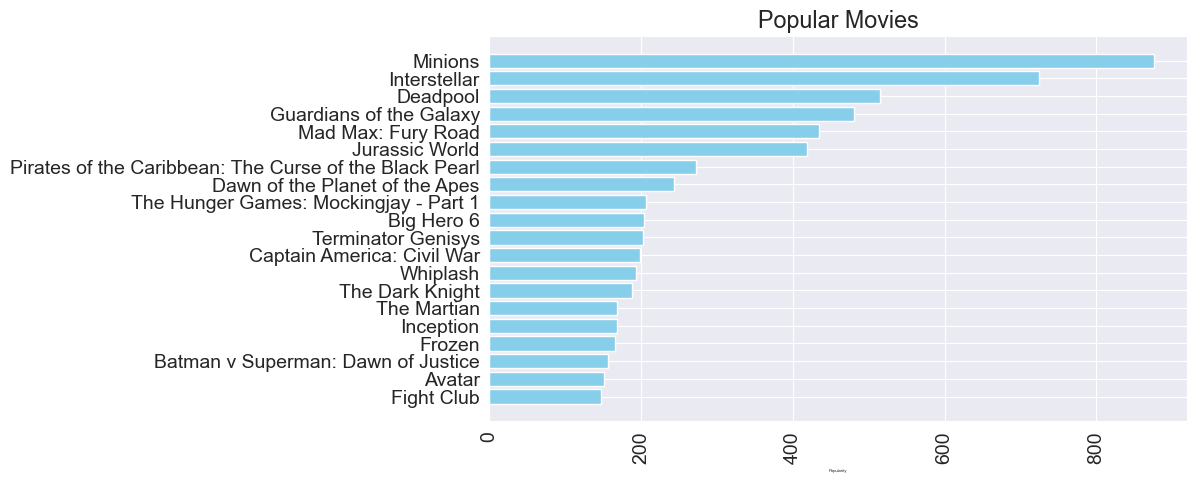

In [19]:
horizontal_bar()

### Scatterplot of Revenue with budget

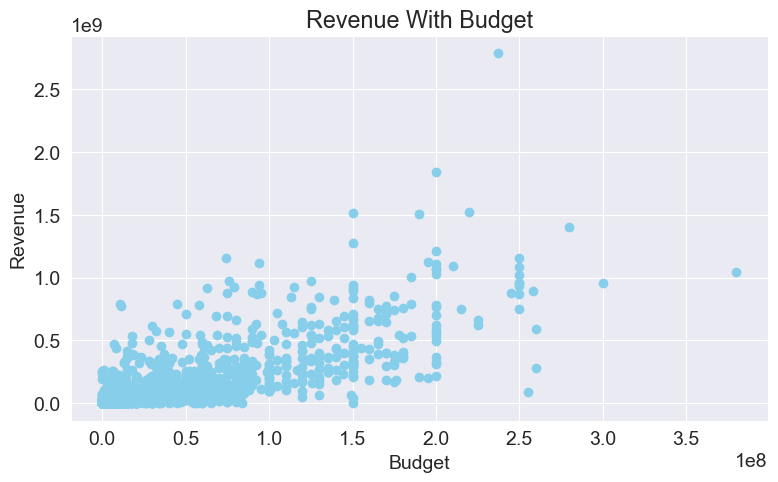

In [20]:
plt.scatter(movies['budget'],movies['revenue'],color='skyblue')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Revenue With Budget")
plt.show()

### Distribution of various columns

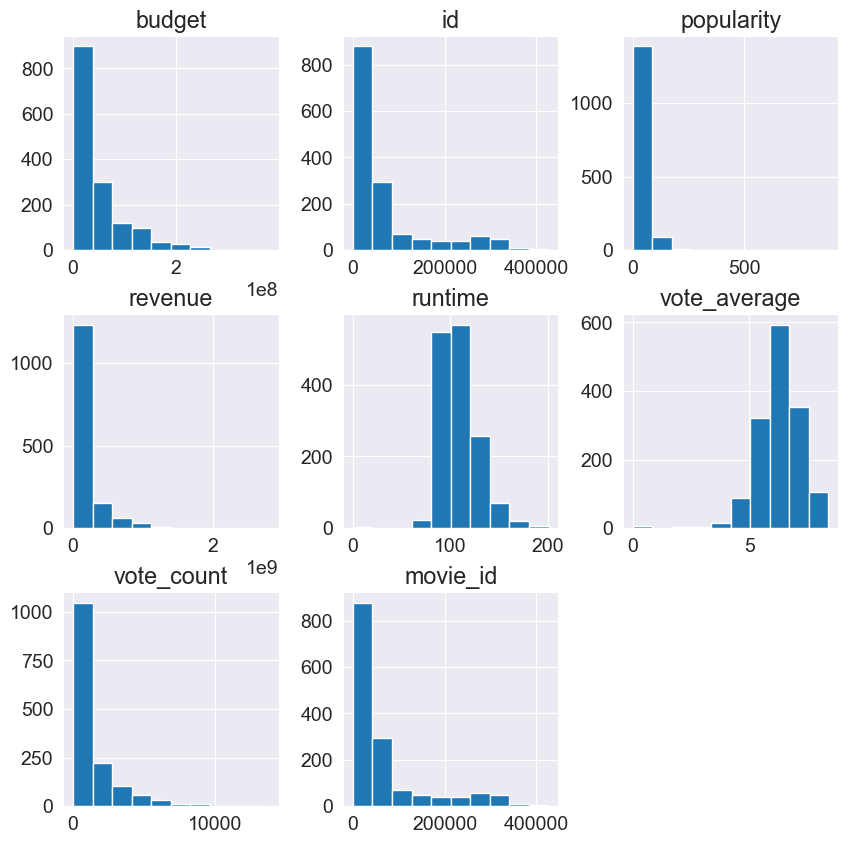

In [21]:
#calling the pandas `hist`() method returns histograms for all columns in the series.
movies.hist(figsize=(10,10));

### Analysing runtime of movies

In [22]:
#defining a function to find the mean of a column
movies['runtime'].mean()

108.66465863453816

In [23]:
#desriptive statistics for runtime column
movies['runtime'].describe()

count    1494.000000
mean      108.664659
std        19.374115
min         0.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       201.000000
Name: runtime, dtype: float64

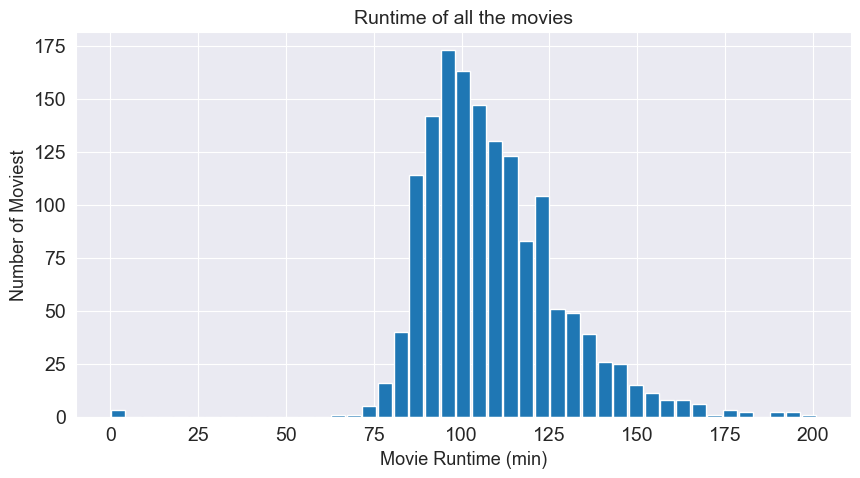

In [24]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(10,5), dpi = 100)

#On x-axis 
plt.xlabel('Movie Runtime (min)', fontsize = 13)
#On y-axis 
plt.ylabel('Number of Moviest', fontsize=13)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=14)

#giving a histogram plot
plt.hist(movies['runtime'], rwidth = 0.9, bins =45)
#displays the plot
plt.show()

In [25]:
#get profit by calculating difference between the budget and revenue
#add new column in the dataframe name 'Profit'
movies['Profit'] = movies['revenue'] - movies['budget']

movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,Profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087


In [26]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = movies[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = movies[x].idxmax()
    high = pd.DataFrame(movies.loc[high_index,:])
    low = pd.DataFrame(movies.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",movies['title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",movies['title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')


Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Lone Ranger


,0,13
budget,237000000,255000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/the-lone-ranger/
id,19995,57201
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""..."
original_language,en,en
original_title,Avatar,The Lone Ranger
overview,"In the 22nd century, a paraplegic Marine is di...",The Texas Rangers chase down a gang of outlaws...
popularity,150.437577,49.046956
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."


### Cleaning the columns for creation of Tags:

In [27]:
# We will use the following columns : genres,movie_id,keywords,overview,production_companies,title,cast,crew
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew','production_companies']]

In [28]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [29]:
# From the genre column we just need the words like Action,Adventure,Fantasy etc. So we will create a function which retrieves those words from the list.
# Also this is a string of list. We need to convert that into a list and then retreive our values.
import ast
def convert(obj):
  l=[]
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l

In [30]:
movies['genres'] = movies['genres'].apply(convert)

In [31]:
#We will use the same function on 'Keywords' column
movies['keywords'] = movies['keywords'].apply(convert)

In [32]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""name"": ""Ingenious Film Partners"", ""id"": 289..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [33]:
movies['production_companies'] = movies['production_companies'].apply(convert)

In [34]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Ingenious Film Partners, Twentieth Century Fo..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Columbia Pictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Legendary Pictures, Warner Bros., DC Entertai..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Walt Disney Pictures]


In [35]:
#For cast we will just take the first 5 names (As they would be playing the lead characters)
def cast(obj):
  counter = 0
  l=[]
  for i in ast.literal_eval(obj):
    if counter != 5:
     l.append(i['name'])
     counter = +1
    else:
      break
  return l

In [36]:
movies['cast'] = movies['cast'].apply(cast)

In [37]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Ingenious Film Partners, Twentieth Century Fo..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Columbia Pictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Legendary Pictures, Warner Bros., DC Entertai..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Walt Disney Pictures]


In [38]:
#For crew we will just take the Director
def crew(obj):
  l=[]
  for i in ast.literal_eval(obj):
    if i['job'] == 'Director':
      l.append(i['name'])
      break
  return l

In [39]:
movies['crew'] = movies['crew'].apply(crew)

In [40]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Ingenious Film Partners, Twentieth Century Fo..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[Columbia Pictures, Danjaq, B24]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],"[Legendary Pictures, Warner Bros., DC Entertai..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],[Walt Disney Pictures]


In [41]:
#Convert the overview column from a string to a list
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [42]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Ingenious Film Partners, Twentieth Century Fo..."


In [43]:
#Removing the spaces between one single entity and creating one tag for it
def collapse(L):
  l = []
  for i in L:
    l.append(i.replace(" ",""))
  return l

In [44]:
movies["genres"] = movies["genres"].apply(collapse)

In [45]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[Ingenious Film Partners, Twentieth Century Fo..."


In [46]:
movies["cast"] = movies["cast"].apply(collapse)
movies["keywords"] = movies["keywords"].apply(collapse)
movies["crew"] = movies["crew"].apply(collapse)
movies["production_companies"] = movies["production_companies"].apply(collapse)

In [47]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,production_companies
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[IngeniousFilmPartners, TwentiethCenturyFoxFil..."


In [48]:
#Concatenate all these columns to make a new column
movies["tags"] = movies["overview"] + movies["genres"] + movies["keywords"] + movies["cast"] + movies["crew"] + movies["production_companies"]
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,production_companies,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[In, the, 22nd, century,, a, paraplegic, Marin..."


In [50]:
df = movies[['movie_id','title','tags']]

In [51]:
df.head(1)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [52]:
#Converting the list to string (in tags column)
df['tags'] = df['tags'].apply(lambda x:" ".join(x))

/var/folders/qv/xvw_5h6140jbyvlmccy0j0c40000gp/T/ipykernel_16085/723264541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x:" ".join(x))


In [53]:
df.head(1)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."


In [54]:
df['tags'] = df['tags'].apply(lambda x:x.lower())

/var/folders/qv/xvw_5h6140jbyvlmccy0j0c40000gp/T/ipykernel_16085/841579467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x:x.lower())


In [55]:
df.head(1)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."


### Using CountVectorizer for creating vectors from tags

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=6000,stop_words ='english')

In [57]:
vectors = cv.fit_transform(df['tags']).toarray()

In [58]:
vectors.shape

(1494, 6000)

### We will find the similarity between each vectors using cosine similarity

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
similarity = cosine_similarity(vectors)

In [61]:
#This represents the similarity of the first vector (in this case movie) with ll the 4806 movies
similarity[0]

array([1.        , 0.05276165, 0.04239039, ..., 0.        , 0.05015699,
       0.02228283])

In [62]:
#Now we will create a function which takes a movie --- finds its index ---- finds the top 5 indexes similiar to it and returns them
def recommend(movie):
  index = df[df['title'] == movie].index[0]
  similar = sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])
  for i in similar[1:6]:
    print(df.iloc[i[0]].title)

In [63]:
recommend('Titanic')

Spectre
Never Say Never Again
Quantum of Solace
Die Another Day
Dr. No


# Insights
1. Minions is the most popular movie from in our dataset based on audience ratings.
2. The average runtime of our movies is around 108 minutes.
3. Budget has a direct relationship with Revenue. Most of the high budget movies tend to do well.
4. Avatar is the highest profitable movie, whereas the Lone ranger is the least profitable.
5. Our movie recommendation system recommends movies based on users input.